# Why python? 

Python is easy-to-use, and easy-to-deploy programming language. It provides excellent library support and has a large developer community. The programming language provides a great starting point for beginners. Python is the most popular programming languages in 2020.
 
![](https://darly.solutions/wp-content/uploads/2021/01/%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA-%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0-2021-01-06-%D0%B2-14.06.12-1024x771.png)

## Link check in 2021: 

* [**Check current update**](https://pypl.github.io/PYPL.html)



# The Jupyter Notebook
> *The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.*

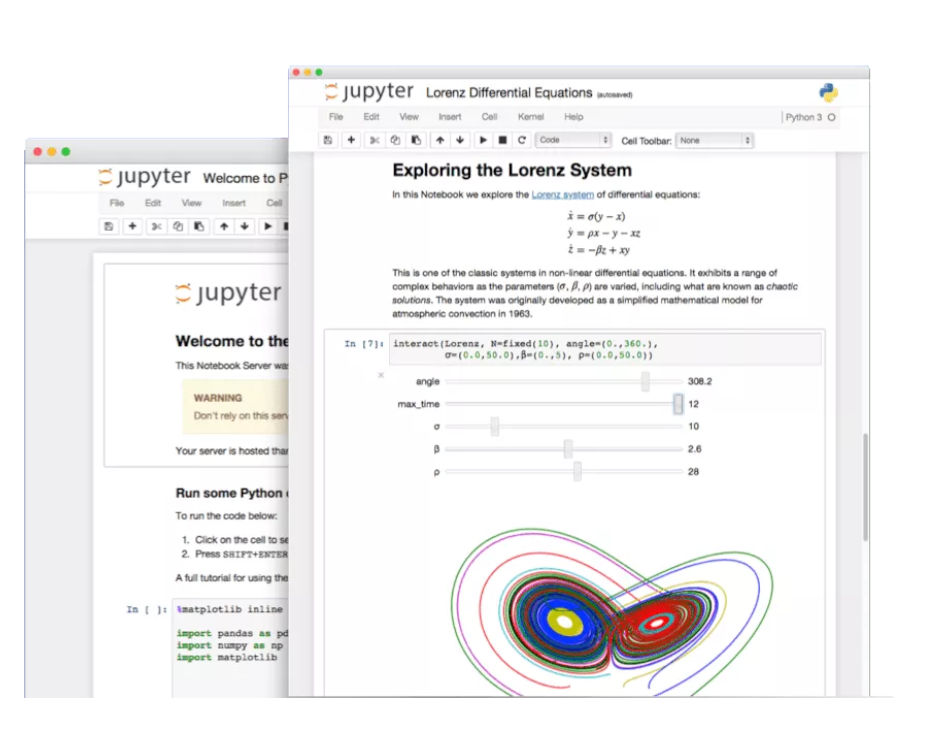

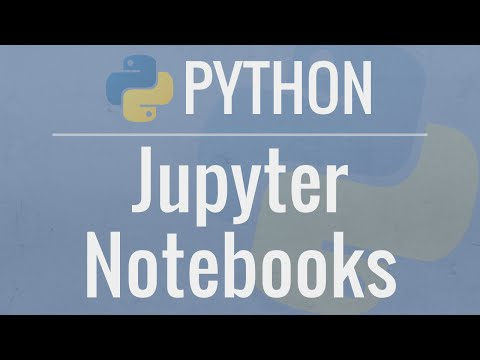

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("HW29067qVWk",720,360,rel=0)

# How easy is python

In [3]:
# Check Python version !!
import sys
!{sys.executable} --version

Python 3.12.3


## Simple example

In [4]:
# Define values
a = 12
b = 2

# Print the results of a + b
print('The results of a + b: ',a + b)

# Print the results of a^b
print('The results of a^b :',a**b)

# Print the results of a/b
print('The results of a/b :',a/b)

The results of a + b:  14
The results of a^b : 144
The results of a/b : 6.0


# Jupiter Notebook Example

Go to [**mybinder web page**]( https://mybinder.org/) pate the github link https://github.com/jvdkwast/Python3_Jupyter_Notebook into GitHub repository name or URL tab
and press launch.
![](https://coderefinery.github.io/jupyter/_images/binder.jpg)

## Or Simple click on the icon below.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jvdkwast/Python3_Jupyter_Notebook/HEAD)



# More example and guideline on Jupiter Notebook and Python.

* [**Applied AI in Smart Grid series**](https://github.com/TrungNguyen87/Applied_AI_in_Smart-Grid/tree/master/Docs)
* [**Jupyter Notebook example**](https://jupyter.org/try)

# How to Install a Package in Python using PIP

> pip install **package_name**


##### example install pypsa power flow calculation package.

In [5]:
pip install pypsa

Note: you may need to restart the kernel to use updated packages.


# Pypsa Quick Start and Example

* [Quick start.](https://pypsa.readthedocs.io/en/latest/quick_start.html)
* [Minimal three node network interactive notebook.](https://pypsa.readthedocs.io/en/latest/examples/minimal_example_pf.html)
* [Battery Electric Vehicle Charging example.](https://pypsa.readthedocs.io/en/latest/examples/battery-electric-vehicle-charging.html)
* [The Network Design.](https://pypsa.readthedocs.io/en/latest/design.html) 



# Design
## Network object is the overall container.

The pypsa.Network is an overall container for all network components; components cannot exist without a network.
It is also the object on which calculations, such as power flow and optimal power flow, are performed.

## Buses are the fundamental nodes.

The bus is the fundamental node to which all loads, generators, storage units, lines, transformers and links attach.

You can have as many components attached to a bus as you want.

The bus’s role is to enforce energy conservation for all elements feeding in and out of it (i.e. like Kirchhoff’s Current Law).

![](https://pypsa.readthedocs.io/en/latest/_images/buses.png)

## Energy flow in the model
Energy enters the model in generators, storage units or stores with higher energy before than after the simulation, and any components with efficiency greater than 1 (e.g. heat pumps).

Energy leaves the model in loads, storage units or stores with higher energy after than before the simulation, and in lines, links or storage units with efficiency less than 1.

# Quick Start Example


In [6]:
import pypsa
import numpy as np

# define network
network = pypsa.Network()

In [7]:
#help(pypsa.Network())

In [8]:
#add three buses
n_buses = 3

for i in range(n_buses):
    network.add("Bus", "My bus {}".format(i),  v_nom=20.) # v_nom is in KV

In [9]:
# check the network after adding bus
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 1,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 2,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


In [10]:
#help(network.add)
#print(network.add.__doc__)

# Line

Lines represent transmission and distribution lines. They connect a bus0 to a bus1. They can connect either AC buses or DC buses. Power flow through lines is not directly controllable, but is determined passively by their impedances and the nodal power imbalances. To see how the impedances are used in the power flow, see [Line model](https://pypsa.readthedocs.io/en/latest/power_flow.html#line-model).


* **x (ohm)**: Series reactance, must be non-zero for AC branch in linear power flow. If the line has series inductance  in Henries then  where  is the frequency in Hertz. Series impedance  must be non-zero for the non-linear power flow. Ignored if type defined.
* **r (ohm)**: Series resistance, must be non-zero for DC branch in linear power flow. Series impedance  must be non-zero for the non-linear power flow. Ignored if type defined.

# Generator

Generators attach to a single bus and can feed in power. It converts energy from its carrier to the carrier-type of the bus to which it is attached.

In the LOPF the limits which a generator can output are set by p_nom*p_max_pu and p_nom*p_min_pu, i.e. by limits defined per unit of the nominal power p_nom.

Generators can either have static or time-varying p_max_pu and p_min_pu.

Generators with static limits are like controllable conventional generators which can dispatch anywhere between p_nom*p_min_pu and p_nom*p_max_pu at all times. The static factor p_max_pu, stored at network.generator.loc[gen_name,"p_max_pu"] essentially acts like a de-rating factor. In the following example p_max_pu = 0.9 and p_min_pu = 0. Since p_nom is 12000 MW, the maximum dispatchable active power is 0.9*12000 MW = 10800 MW. Look at [Generator Components](https://pypsa.readthedocs.io/en/latest/components.html#generator) here

In [11]:
#help( network.add)

In [12]:
#add three lines in a ring

for i in range(n_buses):
    network.add("Line", "My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%3),
                x=0.1,
                r=0.01)


In [13]:

#add a generator at bus 0
# p_set(MW):  active power set point (for PF)
# q_set (Mvar): reactive power set point (for PF)

network.add("Generator", "My gen",
            bus="My bus 0",
            p_set=100,
            control="PQ")


#add a load at bus 1
network.add("Load", "My load",
            bus="My bus 1",
            p_set=100,
            q_set=100)

In [14]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Minimal three node network

Here, we are going to create a network with three nodes, three lines and one generator. We then solve the non-linear power flow using a Newton-Raphson.



In [15]:
import pypsa
import numpy as np

network = pypsa.Network()

# add 3 buses
n_buses = 3

for i in range(n_buses):
    network.add("Bus","My bus {}".format(i),
                v_nom=20.)

network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
My bus 0,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 1,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
My bus 2,20.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


In [16]:
# Add three lines in a ring

for i in range(n_buses):
    
    network.add("Line","My line {}".format(i),
                bus0="My bus {}".format(i),
                bus1="My bus {}".format((i+1)%n_buses),
                x=0.1,
                r=0.01,s_nom = 70)

network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
network.lines.s_nom

Line
My line 0    70.0
My line 1    70.0
My line 2    70.0
Name: s_nom, dtype: float64

In [18]:
# Add a generator at bus 0

network.add("Generator","My gen",
            bus="My bus 0",
            p_set=100,
            control="PQ")

network.generators

attribute,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
My gen,My bus 0,PQ,,0.0,0.0,False,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [19]:
network.generators.p_set

Generator
My gen    100.0
Name: p_set, dtype: float64

In [20]:
#Add a load at bus 1

network.add("Load","My load",
            bus="My bus 1",
            p_set=100)

network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
My load,My bus 1,,,100.0,0.0,-1.0


In [21]:
network.loads.p_set

Load
My load    100.0
Name: p_set, dtype: float64

In [22]:
#Fix the reactive power of the load

network.loads.q_set = 100.

# Power Flow

> See the module pypsa.pf.
> 
> Full non-linear power flow.

> The non-linear power flow network.pf() works for AC networks and by extension for DC networks too (with a work-around described below).
> 
> The non-linear power flow network.pf() can be called for a particular snapshot as network.pf(snapshot) or on an iterable of snapshots as network.pf(snapshots) to calculate the non-linear power flow on a selection of snapshots at once (which is more performant than calling network.pf on each snapshot separately). If no argument is passed, it will be called on all network.snapshots, see pypsa.Network.pf() for details.

## Do a Newton-Raphson power flow


In [24]:
network.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')


AttributeError: `np.Inf` was removed in the NumPy 2.0 release. Use `np.inf` instead.

> **network.lines_t**: All time-dependent line information compiled by PyPSA from inputs. Dictionary keys are time-dependent series attributes, index is network.snapshots, columns are line names.

In [25]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
My line 0,My bus 0,My bus 1,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 1,My bus 1,My bus 2,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0
My line 2,My bus 2,My bus 0,,0.1,0.01,0.0,0.0,70.0,0.0,False,...,inf,0,0.00025,0.000025,0.0,0.0,0.00025,0.000025,0.0,20.0


In [26]:
# what are the voltage angles on the buses?
# v_ang (radians): Voltage angle

network.buses_t.v_ang*180/np.pi

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,0.0,0.0,0.0


In [27]:
# their mangitudes?
# v_mag_pu (per unit)Voltage magnitude, per unit of v_nom
network.buses_t.v_mag_pu

Bus,My bus 0,My bus 1,My bus 2
snapshot,,,
now,1.0,1.0,1.0


In [28]:
network.lines_t.p0

Line,My line 0,My line 1,My line 2
snapshot,,,
now,0.0,0.0,0.0


In [29]:
network.lines_t.p0/network.lines.s_nom

Line,My line 0,My line 1,My line 2
snapshot,,,
now,0.0,0.0,0.0
